In [1]:
from ucimlrepo import fetch_ucirepo 
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_data(df):
    plt.figure(figsize=(20, 10), layout="tight")
    for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
        if i == 9:
            break
        plt.subplot(3, 3, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)

  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
df = chronic_kidney_disease.data.original
columns = {
    "age",
    "blood pressure",
    "specific gravity",
    "albumin",
    "sugar",
    "blood glucose random",
    "blood urea",
    "sodium",
    "potassium",
    "hemoglobin",
    "packed cell volume",
    "white blood cell count",
    "red blood cell count",
    "class"
}

var = chronic_kidney_disease.variables
columns = var[var["description"].isin(columns) | var["name"].isin(columns)]
rename_map = dict(
    zip(
        columns["name"],
        columns["description"].replace("", pd.NA).fillna(columns["name"])
    )
)
rename_map["class"] = "class"
df = df.rename(rename_map, axis = 1) # Rename columns from Name -> Description
df = df[rename_map.values()] # Filter columns to only keep columns defined in columns set
df["hemoglobin"] *= 10 # Hemoglobin from g/dl to g/l
df["class"] = df["class"].apply(lambda v: "a" if v == "ckd" else "c") # Recode class column values
df = df[df.isna().sum(axis=1) < 3] # Drop rows with 3 or more NaN values
df = df[(df["blood pressure"] < 140) & (df["potassium"] < 10)] # Filter outliers
affected, controlled = df[df["class"] == "a"], df[df["class"] == "c"] # Split affected and controlled individuals in to their own groups
display(Markdown(f"# Affected indivuals ({len(affected)} rows)"))
display(affected)
display(Markdown(f"# Controlled indivuals ({len(controlled)} rows)"))
display(controlled)

# Affected indivuals (105 rows)

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,114.0,3.7,95.0,29.0,12100.0,3.7,a
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,131.0,4.2,108.0,32.0,4500.0,3.8,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,134.0,47.0,11000.0,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,122.0,40.0,9800.0,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,86.0,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,126.0,37.0,10200.0,4.1,a


# Controlled indivuals (134 rows)

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


# Affected individuals histograms

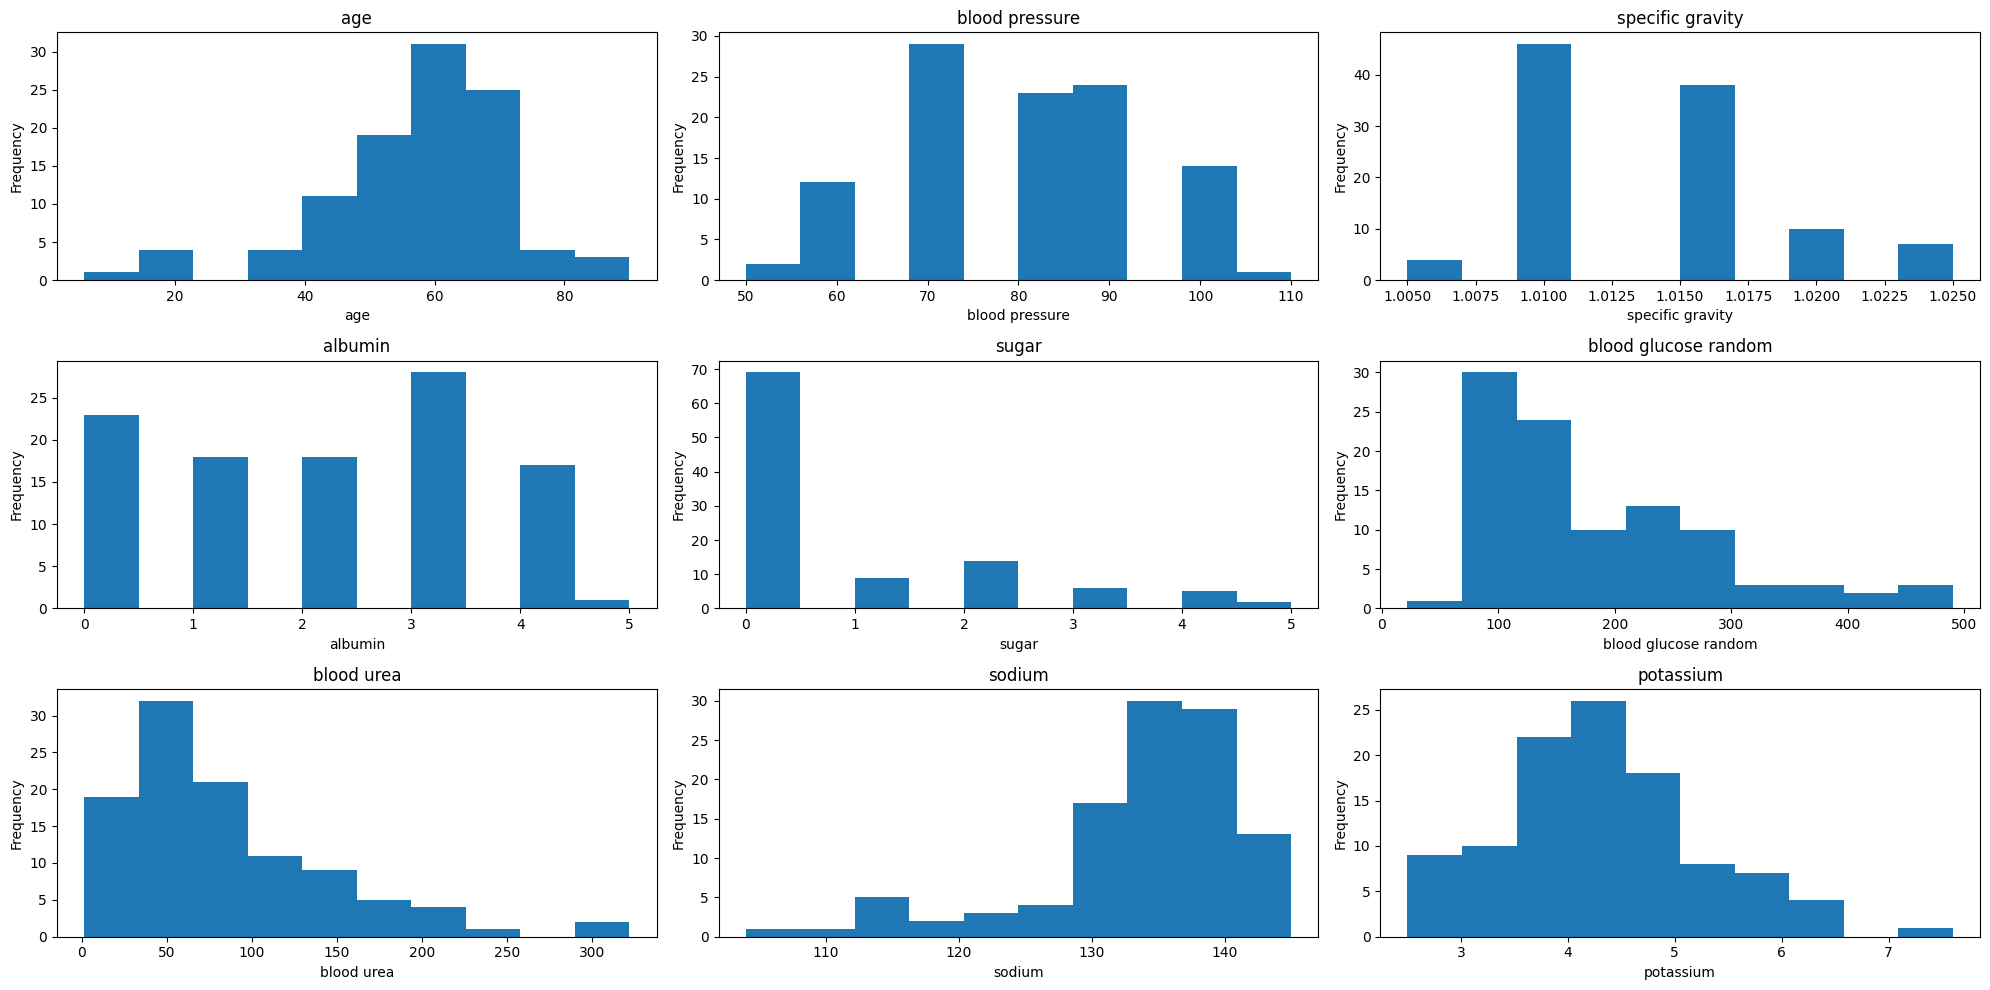

In [2]:
display(Markdown("# Affected individuals histograms"))
plot_data(affected)

# Controlled individuals histograms

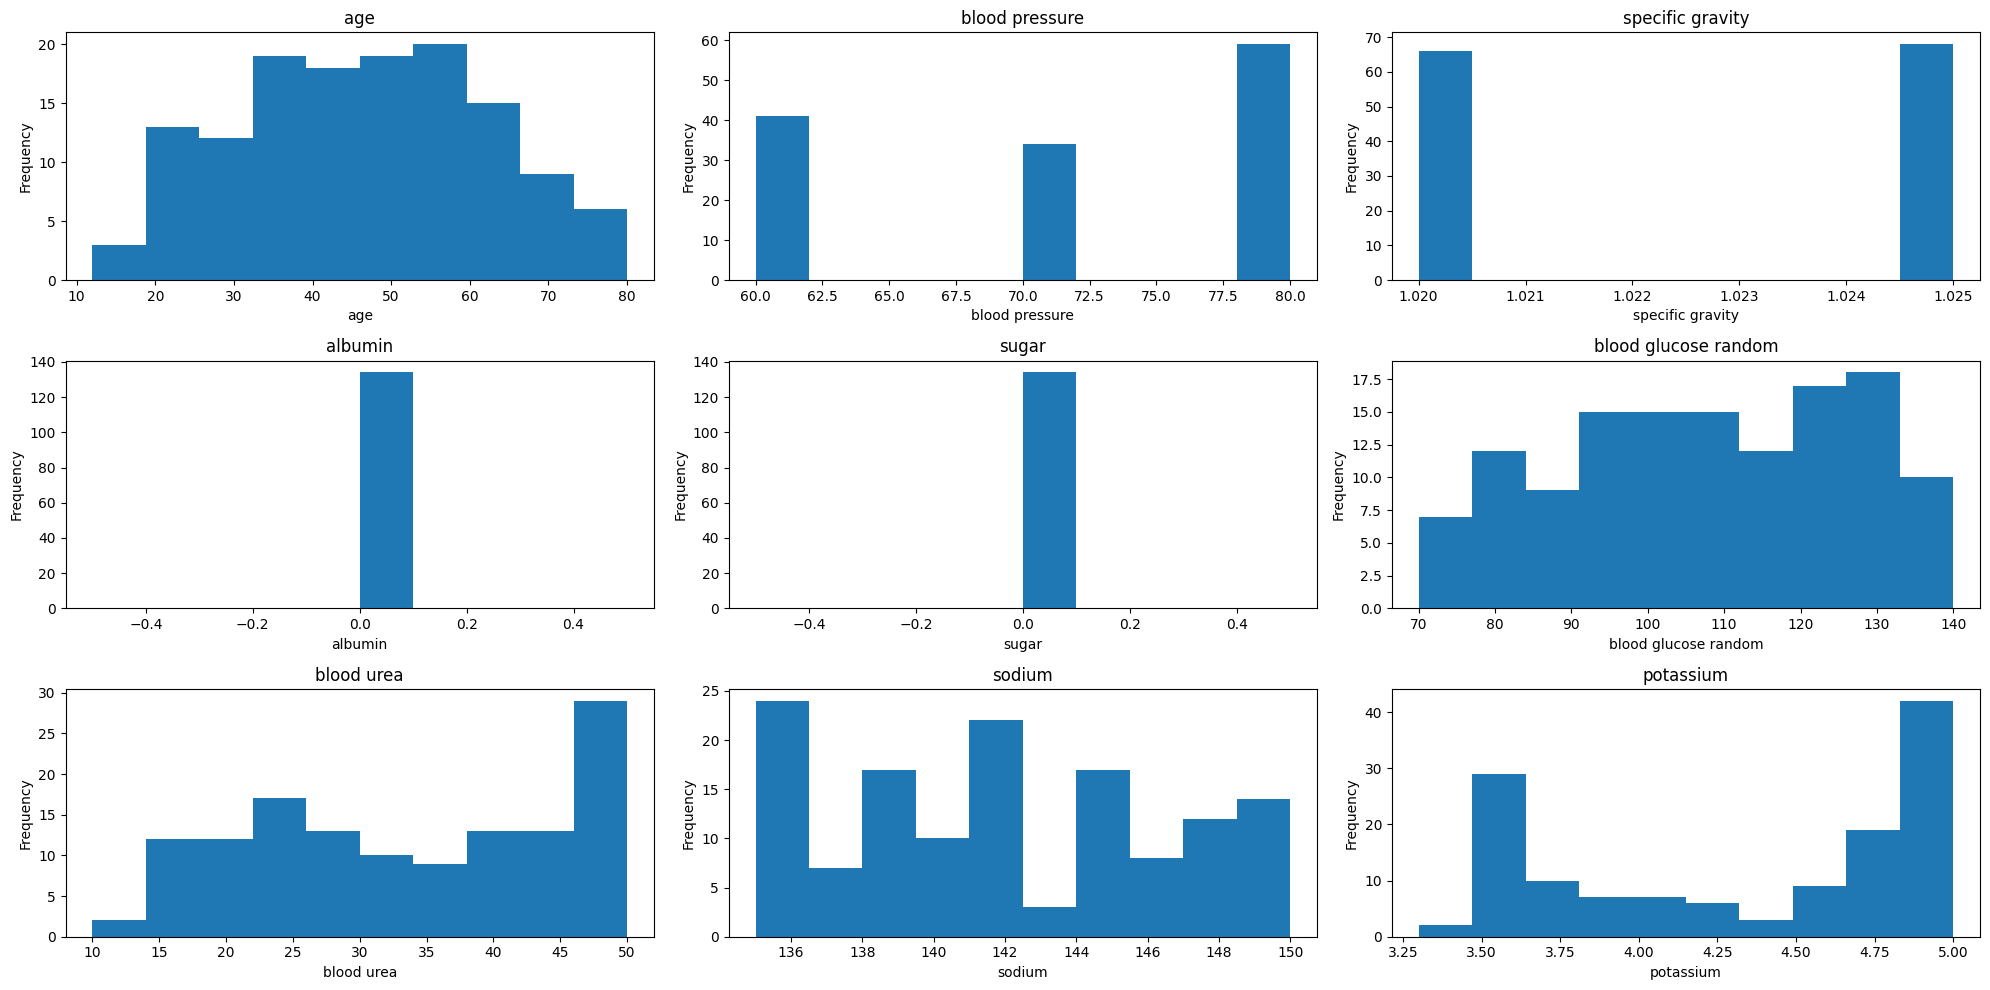

In [3]:
display(Markdown("# Controlled individuals histograms"))
plot_data(controlled)

# Affected individuals correlation matrix

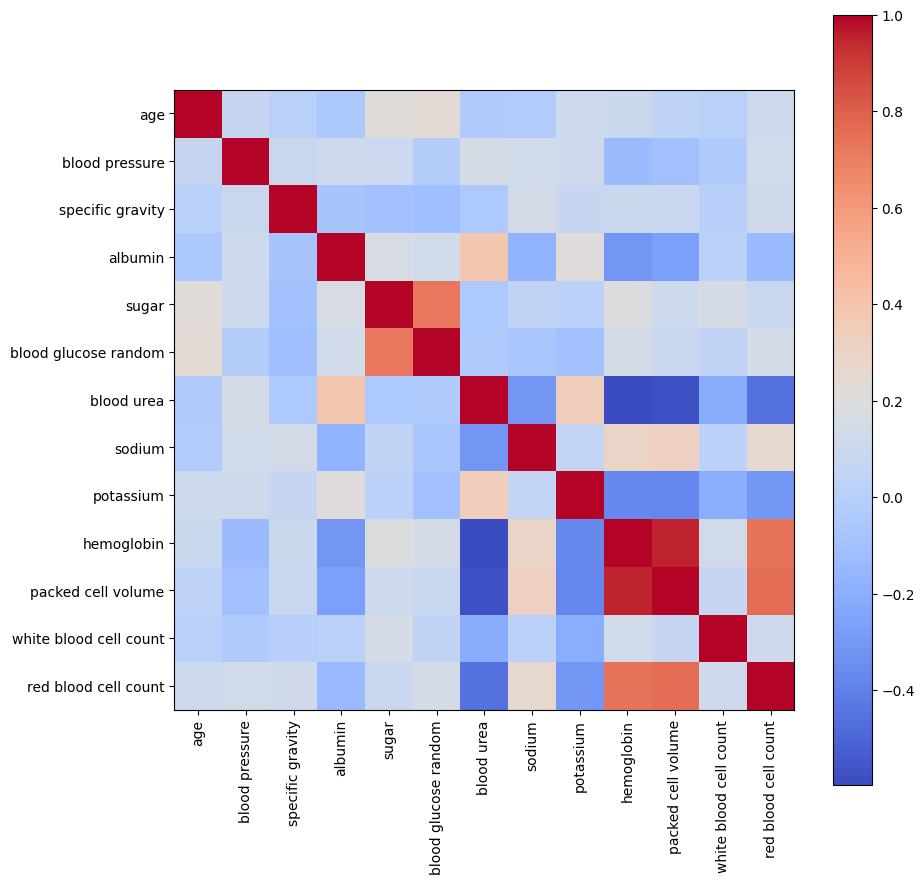

In [4]:
display(Markdown("# Affected individuals correlation matrix"))
corr = affected.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

# Controlled individuals correlation matrix

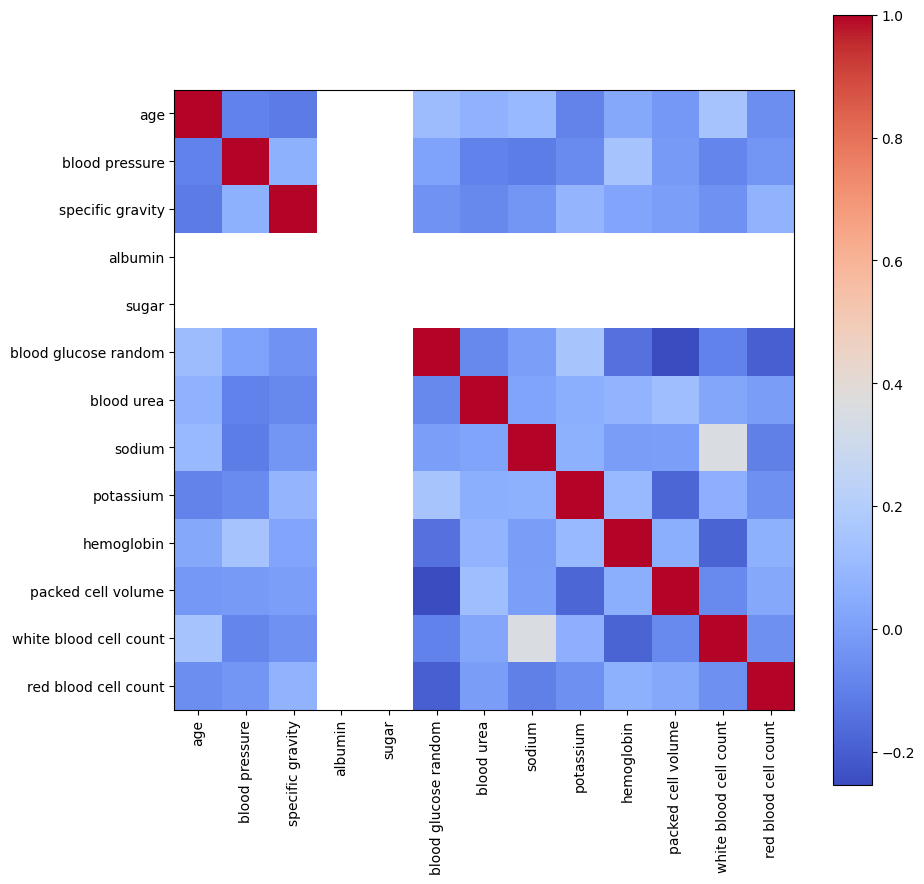

In [5]:
display(Markdown("# Controlled individuals correlation matrix"))
corr = controlled.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

Hemoglobin correlates with red blood cell count because hemoglobin is a protein inside red blood cells.
Blood urea and hemoglobin have a negative correlation. Higher urea can signal kidney disease.